題目：國際失學兒
作者：Pecu
資料來源：https://data.worldbank.org/indicator/SE.PRM.UNER.FE?view=chart&year_high_desc=true

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# This is a custom matplotlib style that I use for most of my charts
# plt.style.use('tableau10.mplstyle')

child_data = pd.read_csv('child.csv')
child_data.head()

,country,child,GDP,Population,rate
0,Ghana,289456,473.30,28830000,0.010040
1,Nepal,99251,244.70,29300000,0.003387
2,Gambia,29313,10.15,2101000,0.013952
3,Uzbekistan,25735,487.20,32390000,0.000795
4,Djibouti,21163,18.45,957000,0.022114


Ghana
Nepal
Gambia
Uzbekistan
Djibouti
Ecuador
Tajikistan
Sao Tome and Principe

兒童於 2017 年的失學人數

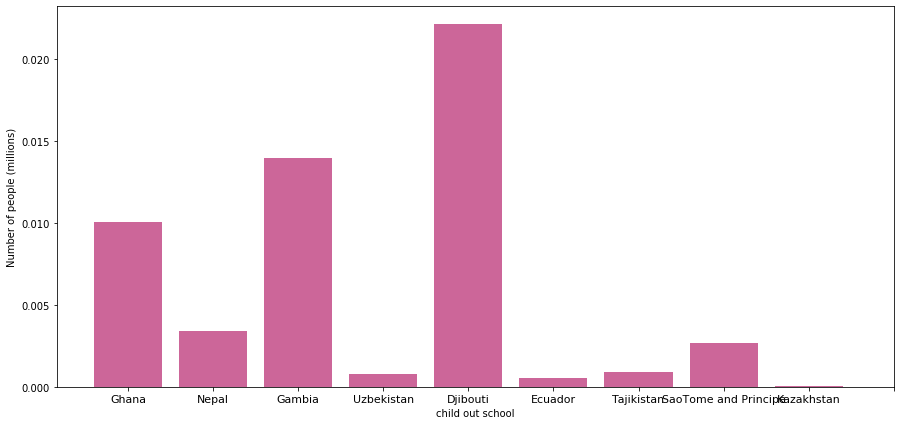

In [3]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)

for (i, row) in child_data.iterrows():
    plt.bar([i], [row['rate']],
            color=['#CC6699'], width=0.8, align='center', edgecolor='none')
    
#plt.xlim(-0.6, 20.6)
#plt.ylim(-12.1e6, 12.1e6)
#plt.grid(False, axis='x')
plt.xticks(np.arange(0, 10), child_data['country'], fontsize=11)
#plt.yticks(np.arange(-12e6, 13e6, 2e6),
#           ['{}m'.format(int(abs(x) / 1e6)) if x != 0 else 0 for x in np.arange(-12e6, 13e6, 2e6)])
plt.xlabel('child out school')
plt.ylabel('Number of people (millions)')

plt.savefig('pop_pyramid_rotated.pdf')

In [77]:
# Data to plot
labels = child_data['country']
labels

0                   Ghana
1                   Nepal
2                  Gambia
3              Uzbekistan
4                Djibouti
5                 Ecuador
6              Tajikistan
7    SaoTome and Principe
8              Kazakhstan
Name: country, dtype: object

In [78]:
sizes = child_data['child']
sizes

0    289456
1     99251
2     29313
3     25735
4     21163
5      9229
6      8176
7       548
8       379
Name: child, dtype: int64

2017 年的全球失學兒共 482871 人
最嚴重的地區是迦納 Ghana (位於西非的國家)

In [79]:
all = pd.Series(sizes).sum()
all

483250

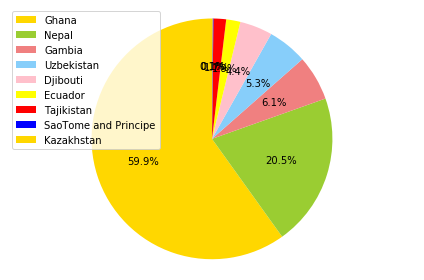

In [80]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'pink', 'yellow', 'red', 'blue']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
patches, texts, autotexts = plt.pie(sizes, colors = colors, autopct='%1.1f%%', startangle=90)

plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

談討國家 GDP 與失學兒的關係，要考慮總人口數，變成探討失學率
最嚴重的國家是吉布地 Djibouti (位於東非的國家)

而聖多美普林西比 SaoTome and Principe (位於中部非洲的國家)
在有限的資源下，即便 GDP 很低 (3.91億美元)，但兒童失學率卻只有 0.002682。
是控制失學狀態最佳的國家。

In [81]:
y = child_data['rate']
y

0    0.010040
1    0.003387
2    0.013952
3    0.000795
4    0.022114
5    0.000555
6    0.000916
7    0.002682
8    0.000021
Name: rate, dtype: float64

In [82]:
x = child_data['GDP']
x

0     473.30
1     244.70
2      10.15
3     487.20
4      18.45
5    1031.00
6      71.46
7       3.91
8    1594.00
Name: GDP, dtype: float64

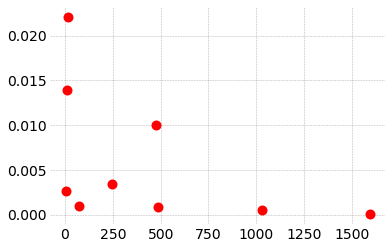

In [83]:
plt.plot(x,y, 'ro')